In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

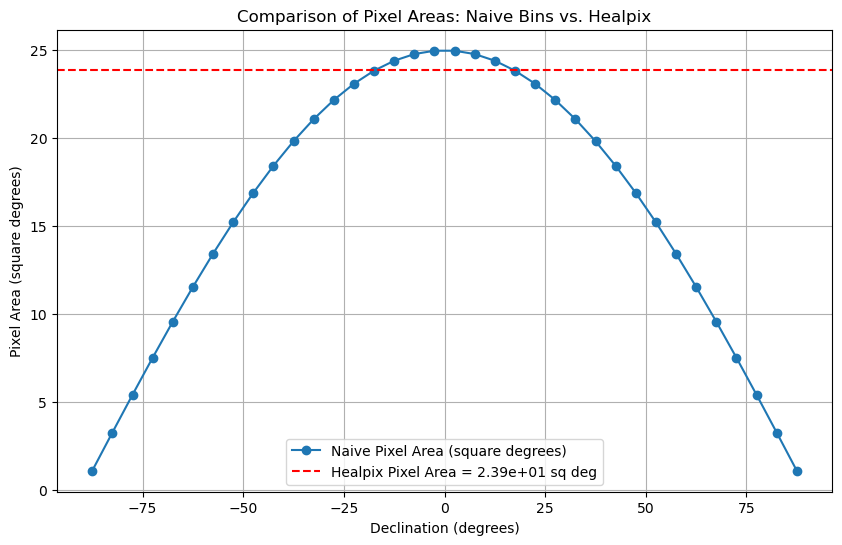

In [2]:
# Define RA and Dec bin size (in degrees)
ra_bin_size = 5  # RA bin size
dec_bin_size = 5  # Dec bin size

# Generate Dec bin centers
min_dec = -90 + dec_bin_size / 2
max_dec = 90 - dec_bin_size / 2
dec_centers = np.arange(min_dec, max_dec + dec_bin_size, dec_bin_size)

# Calculate pixel areas for each Dec bin
# Area of a pixel on the celestial sphere: A = \( \Delta RA \times (\sin(\text{Dec} + \Delta Dec / 2) - \sin(\text{Dec} - \Delta Dec / 2)) \)
ra_bin_size_rad = np.deg2rad(ra_bin_size)  # Convert RA bin size to radians
dec_bin_size_rad = np.deg2rad(dec_bin_size)  # Convert Dec bin size to radians

areas_steradians = []
for dec in dec_centers:
    dec_rad = np.deg2rad(dec)
    area = ra_bin_size_rad * (np.sin(dec_rad + dec_bin_size_rad / 2) - np.sin(dec_rad - dec_bin_size_rad / 2))
    areas_steradians.append(area)

# Convert areas to square degrees
steradian_to_sq_deg = (180 / np.pi)**2
areas_sq_deg = np.array(areas_steradians) * steradian_to_sq_deg

# Healpix demonstration
nside = 12  # Healpix resolution parameter
npix = hp.nside2npix(nside)  # Total number of pixels
healpix_area_steradians = 4 * np.pi / npix  # Area of each Healpix pixel in steradians
healpix_area_sq_deg = healpix_area_steradians * steradian_to_sq_deg

# Plot naive areas and Healpix areas together
plt.figure(figsize=(10, 6))
plt.plot(dec_centers, areas_sq_deg, marker='o', label='Naive Pixel Area (square degrees)')
plt.axhline(healpix_area_sq_deg, color='r', linestyle='--', label=f'Healpix Pixel Area = {healpix_area_sq_deg:.2e} sq deg')
plt.xlabel('Declination (degrees)')
plt.ylabel('Pixel Area (square degrees)')
plt.title('Comparison of Pixel Areas: Naive Bins vs. Healpix')
plt.grid()
plt.legend()
plt.show()

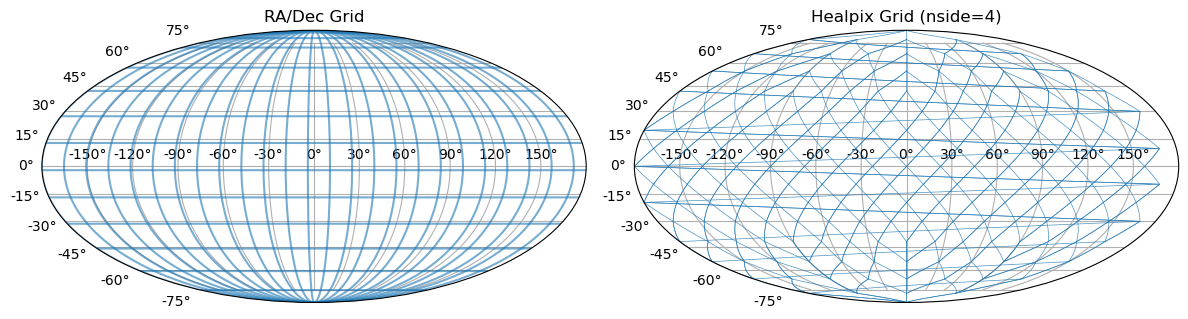

In [4]:
# Function to plot RA/Dec grid
def plot_ra_dec_grid(ax, ra_bin_size, dec_bin_size):
    # Generate grid lines for RA and Dec
    ra_edges = np.arange(0, 360, ra_bin_size)
    dec_edges = np.arange(-90, 90 + dec_bin_size, dec_bin_size)

    # Plot RA grid lines
    for ra in ra_edges:
        ra_rad = np.deg2rad(ra - 180)  # Convert RA to Mollweide projection coordinates
        decs = np.linspace(-90, 90, 1000)
        ax.plot(ra_rad * np.ones_like(decs), np.deg2rad(decs), c='tab:blue', alpha=0.6)

    # Plot Dec grid lines
    for dec in dec_edges:
        dec_rad = np.deg2rad(dec)
        ras = np.linspace(-180, 180, 1000)
        ax.plot(np.deg2rad(ras), dec_rad * np.ones_like(ras), c='tab:blue', alpha=0.6)

    ax.set_title("RA/Dec Grid", fontsize=12)
    ax.grid(True)

# Function to plot Healpix grid boundaries
def plot_healpix_grid(ax, nside):
    npix = hp.nside2npix(nside)
    for pix in range(npix):
        vertices = hp.boundaries(nside, pix, step=1, nest=False)
        theta, phi = hp.vec2ang(vertices.T)  # Convert to spherical angles
        x = np.remainder(phi + np.pi, 2 * np.pi) - np.pi  # Wrap-around handling
        y = -theta + np.pi / 2
        ax.plot(x, y, c='tab:blue', lw=0.5, alpha=0.8)  # Plot boundaries with better visibility

    ax.set_title(f"Healpix Grid (nside={nside})", fontsize=12)
    ax.grid(True)


# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 7), subplot_kw={'projection': 'mollweide'})

# Plot Healpix grid
nside = 4  # Healpix resolution parameter
plot_healpix_grid(axes[1], nside)

npix = hp.nside2npix(nside)  # Total number of pixels
area_steradians = 4 * np.pi / npix  # Area in steradians
steradian_to_sq_deg = (180 / np.pi)**2  # Conversion factor to square degrees
area_sq_deg = area_steradians * steradian_to_sq_deg

# Plot RA/Dec grid
ra_bin_size = np.sqrt(area_sq_deg)  # RA bin size in degrees
dec_bin_size = np.sqrt(area_sq_deg) # Dec bin size in degrees
plot_ra_dec_grid(axes[0], ra_bin_size, dec_bin_size)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('plots/sphere_grid.png', bbox_inches='tight', facecolor='white')
plt.show()
